In [7]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson
from numpy.polynomial.polynomial import Polynomial

Area CSTR: [6.4, 6.4]
Area PFR: [2.2, 2.15]


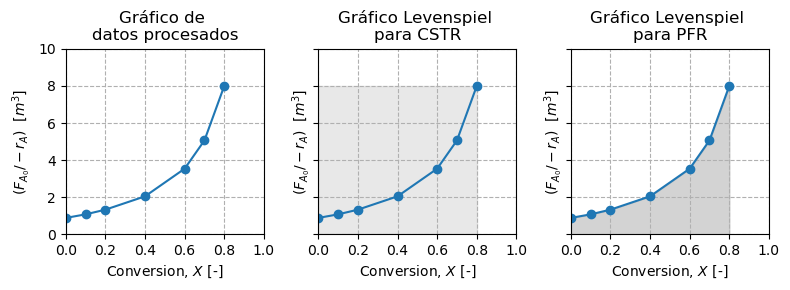

In [8]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(8, 3))

X = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
rA = -1. * np.array([0.45, 0.37, 0.30, 0.195, 0.113, 0.079, 0.05]) #[(mol.m-3).s-1]
FA0 = 0.4

# raw data plot
axes[0].set_title("Gráfico de \ndatos procesados")
axes[0].plot(X, -FA0/rA, ls='-', marker='o', label=r'data')

# Levenspiel plot for CSTR
axes[1].set_title("Gráfico Levenspiel \npara CSTR")
x, y = X, -FA0/rA[-1] * np.ones_like(X)
axes[1].fill_between(x, 0, y, color='lightgray', alpha=0.5, label='Volume CSTR')
axes[1].plot(X, -FA0/rA, ls='-', marker='o')
# integration
areaT, areaS = trapezoid(y, x), simpson(y, x)
print(f"Area CSTR: [{np.round(areaT, 2)}, {np.round(areaS,2)}]")

# Levenspiel plot for PFR
axes[2].set_title("Gráfico Levenspiel \npara PFR")
x, y = X, -FA0/rA
axes[2].fill_between(X, 0, -FA0/rA, color='darkgray', alpha=0.5, label='Volume PFR')
axes[2].plot(X, -FA0/rA, ls='-', marker='o')
areaT, areaS = trapezoid(y, x), simpson(y, x)
print(f"Area PFR: [{np.round(areaT, 2)}, {np.round(areaS,2)}]")

for ax in axes:
    ax.set(xlabel=r'Conversion, $X$ [-]', ylabel=r'$(F_{A_0}/-r_{A})$  [$m^3$]',
           xlim=(0, 1), ylim=(0, 10))
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.grid(ls='--')
    #ax.legend()

fig.tight_layout()

path = os.path.join("../", "images", "levenspiel.png")
fig.savefig(path,dpi=300)

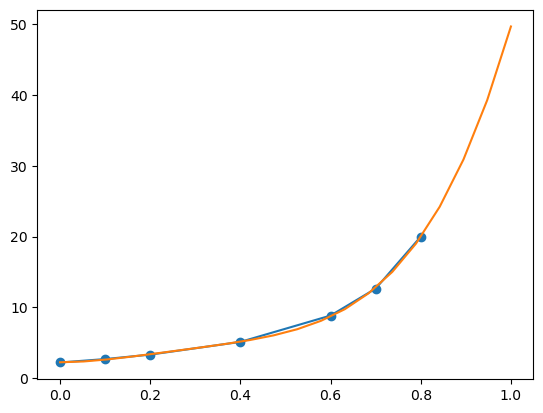

In [9]:
# polynomial fitting
fit = Polynomial.fit(X, -1/rA, deg=4)
x = np.linspace(0, 1.0, 20)

fig, ax = plt.subplots()
ax.plot(X, -1/rA, 'o-')
ax.plot(x, fit(x))
